# Introduction to GeoPandas. Part 2


Welcome. This is the second part of the Introduction to GeoPandas Workshop. Today we will be finally talking about [GeoPandas](https://geopandas.org/ "GeoPandas") (gpd). GeoPandas is a very popular tool to explore and manipulate GIS data in Python. As we discovered last time, it is based on Pandas, which entails that it is naturally integrated in many other popular packages. If you plan to create a data analysis pipeline involving GIS data, GeoPandas is likely a good choice.

<div class="alert alert-block alert-success">
<b>More Technical:</b> Throughout the notebook. This kind of boxes provide more technical details on what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

There are four main components in GeoPandas: 
1.   Pandas will handle the data you load;
2.   Fedora will open GIS file of many, many kinds;
3.   Shapely will deal with geometrical operations on the shapes we have;
4.   Matplotlib will plot your maps.

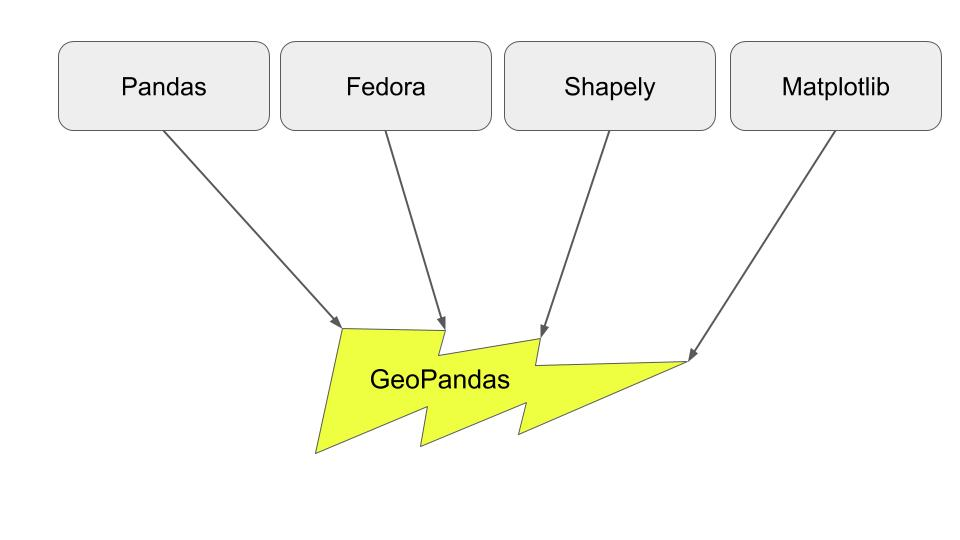


<div class="alert alert-block alert-success">
<b>Descartes:</b> To plot, gpd uses a matplotlib-based package named Descartes, which transforms shapely geometrical objects into matplotlib objects. In my own experience, I have rarely interacted with this package myself.
</div>

As a first step, we need to import GeoPandas. Here I also make sure that the version of gpd we are using is up to date. Some of the code I wrote will not work otherwise -- and it is, in general, a good idea to have our package updated when we start a new project.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
# We use shapely a little bit later
import shapely, pyproj
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# This line check the pandas version and it makes sure it is at least 1.0.2
version = pd.__version__.split(".")
print(f"Pandas version: {pd.__version__}")
assert int(version[0]) >= 1
assert int(version[2]) >= 2

# This line checks the version of gpd and makes sure it is >0.7
version = gpd.__version__.split(".")
print(f"GeoPandas version: {gpd.__version__}")
assert int(version[1]) >= 1


Pandas version: 1.0.4
GeoPandas version: 0.7.0


### The Geo in GeoPandas

Last time, we saw that the two main objects in Pandas are Series and DataFrame. You will not be surprised to learn that the main two objects in GeoPandas are the **GeoSeries** and the **GeoDataFrame**. The GeoSeries and GeoDataFrame are really the geographical version of Series and DataFrame: you can handle exactly as you handle ordinary Pandas Series and DataFrame. That is, you can think about the Geo-versions of these objects as having all the methods and attributes of their Pandas' parents. 
There is one main difference, though. GeoSeries and GeoDataFrames have their own specific attributes and methods dealing with the GIS data they contain. We explore this characteristic here. Just for this first exploration, we create a GeoSeries and a GeoDataFrame from scratch. We create 4 points with random coordinates, using numpy to draw random numbers between 0 and 1. 


<div class="alert alert-block alert-success">
<b>Shapely:</b> It is often very useful to know Shapely to manipulate geometrical objects above and beyond what GeoPandas allows you to do. The best resource to learn Shapely (to my knowledge) is its User Manual: https://shapely.readthedocs.io/en/latest/manual.html
</div>


Let's start with creating a GeoSeries. You will remember from last time that Pandas Series can contain different type of data and that different operations are allowed based on the data type. A GeoSeries is specific object from GeoPandas. It is meant to contain one and only one type of data: the `geometry` dtype.  `geometry` is a dtype that is specific to GeoPandas -- you will not find it in Pandas. As the name suggests, it is meant to contain and manipulate information about geometric point in a (2D) space. This is the dtype that will store information about our maps. Leaving the constraints on dtype aside, a GeoSeries behaves exactly as a Series: it has the _shape_ ,  _dtype_ , _index_ and _values_ attributes.

To create the GeoSeries we use the [points_from_xy](https://geopandas.readthedocs.io/en/latest/reference/geopandas.points_from_xy.html#geopandas.points_from_xy, "points_from_xy Documentation") method, which creates a list of shapely points starting from a list (or array) of x coordinates and an array of y coordinates. 

In [ ]:
# To create a GeoSeries/GeoDataFrame we need a series of geometrical objects.
# Start with drawing random numbers
np.random.seed(345)
coords = np.random.random((4,2))
print(f"These are the random coordinate:\n{coords}")
# We pass the rows as separate arguments to points_from_xy.
# The first row will become the x coordinates of the points
# The second row will become the y coordinates of the points
pts = gpd.points_from_xy(coords[:,0], coords[:,1])
pts = gpd.GeoSeries(pts)
# Let us see some of the attributes of the GeoSeries
print(f"This is the shape attribute: {pts.shape}")
print(f"This is the dtype attribute: {pts.dtype}")
print(f"This is the index attribute: {pts.index}")
print(f"This is the values attribute:\n{pts.values}\n")
# As usual, the default index is just an ordered array of integers.
# We change the index to something more interesting
new_ind = ['Paul', 'George', 'John', 'Richard']
pts.index = new_ind
print(f"This is the new index attribute: {pts.index}")

GeoSeries are and Series can be combined to create a GeoDataFrame. This is a Pandas DataFrame with a special column storing the shape the geometrical information about the data and a special attribute storing the coordinate system of the data. The special column is indicated as the geometry column of the GeoDataFrame, it is of the `geometry` dtype and it is registered in the _geometry_ attribute of the GeoDataFrame. On a more technical level, the "geometry" column can contain any kind of Shapely geometrical objects: points, polygons, lines and collections of those. We can use any properly-shaped GeoSeries as the geometry column of a GeoDataFrame. Most of the time, this column will aslo be named as "geometry", even if it can have any arbitrary name.

As for the coordinate system, we will get back to it with real data.

<div class="alert alert-block alert-success">
<b>Multiple Geometries:</b> As the documentation itself acknowledges, things get 'somewhat confusing' with all the different (and important!) things named "geometry" in GeoPandas. To be clear, a GeoDataFrame will always have only one geometry, but it can have more than one column of the geometry dtype and there is no need to have a column named 'geometry'. However, there is the need for a GeoDataFrame to have a geometry in order to access geometry based methods (like plotting).
</div>

Let's build a GeoDataFrame with the GeoSeries we created above as its geometry.

In [ ]:
# We will collect few other data in Series in order to create a GeoDataFrame
dob = [1942, 1943, 1940, 1940]
dob = pd.Series(dob)
dob.index = new_ind
most_famous_song = ['Yesterday', 'Here Comes the Sun', 'She Loves You', 'Yellow Submarine']
most_famous_song = pd.Series(most_famous_song)
most_famous_song.index = new_ind
# Now we create a new GeoDataFrame
# Notice that the name of the geometry column is not "geometry"
beatles_gdf = gpd.GeoDataFrame({'dob': dob, 'song': most_famous_song, 'geometry': pts})
# As usual we use .head() to see the first (and only) lines
print(f'This is the GeoDataFrame:\n{beatles_gdf}\n\n')
# Since we passed a column named "geometry", GeoPandas rightly guessed this is the column we wanted as our geometry
# This is pretty standard practice
print(f'This is the geometry attribute of the GeoDataFrame:\n{beatles_gdf.geometry}\n')
# If you are wondering which column is set as a geometry, it is registered in the geometry.name attribute
print(f'This is the name of the column containing the geometry: {beatles_gdf.geometry.name}')

You may be wondering what is so special about the geometry column of a GeoDataFrame. The data in this column is used in all the methods and attributes dealing with geometrical properties. Following there are few examples of these methods. Here we use [.buffer( )](https://geopandas.org/geometric_manipulations.html#geoseries.buffer, ".buffer() Documentation"), [.envelope](https://geopandas.org/geometric_manipulations.html#geoseries.envelope, ".envelope() Documentation"), [.area](https://geopandas.org/geometric_manipulations.html#geoseries.area, ".area Documentation") and [.boundary](https://geopandas.org/geometric_manipulations.html#geoseries.boundary, ".boundary Documentation").

The geometry column is also what is plotted by the .plot() method of a GeoDataFrame. We use it here to show the various transformations visually, but we will talk about it a little later.

In [ ]:
# You can plot the geometry -- more on this later
beatles_gdf.plot()
# You can expand the points into circles with buffer
beatles_gdf['geometry'] = beatles_gdf.buffer(0.04)
beatles_gdf.plot()
# You can create rectangles around it!
beatles_gdf['geometry'] = beatles_gdf.envelope
beatles_gdf.plot()
# You can ask for the boundary -- the points delimiting the objects in the geometry
beatles_gdf = beatles_gdf.boundary
beatles_gdf.plot()

#### Your turn!

I have set up two lists. The first list contains two Shapely geometrical objects -- namely, a LineCollection. The second list contains two strings. The final objective is to create a GeoDataFrame having the LineCollection as a geometry, plot it, get its area and the rotate it by 90 degrees. 

To get the area of a geometry you can use the [.area](https://geopandas.org/geometric_manipulations.html#geoseries.area, ".area Documentation") attribute. To rotate a geometry you can use the [.rotate( )](https://geopandas.org/geometric_manipulations.html#geoseries.rotate, ".rotate( ) Documentation"). Look in the comment for suggestions.



In [ ]:
# These lines are just creating the right types of geometrical objects with the right coordinates
coords1 = [((5.5, 0), (5,5), (0, 6.5), (5, 9), (5.5, 14), (9, 10.5), (14, 12), (11.5, 6.5), (14, 2), (9, 3.5), (5.5, 0))]
coords2 = [((-10, -8), (-9,-9), (-8,-8), (-8, 0)), ((-8, 0), (-1,0), (-4,4), (-8,5), (-12,4), (-15, 0), (-8, 0))]
geom1 = shapely.geometry.MultiLineString(coords1)
geom2 = shapely.geometry.MultiLineString(coords2)

# These are the two lists mentioned in the prompt
list_geom    = [geom1, geom2]
list_strings = ['Starman', 'Singing in the Rain']

# Create a GeoDataFrame
# new_gdf = gpd.GeoDataFrame({'Titles':... , 'geometry': ...})

# plot it

# Rotate the geometry by 90 degress.
# For example, new_gdf.rotate(180) will rotate the geometry by 180 degrees

# plot the rotate geometry

# Get the area of the geometry

# Why these values for the area?
# Because the objects in the geometry are lines. Lines have no area

### Data Analysis with GeoPandas

Rotating umbrellas and stars is fun. However, it turns out, this is not why GeoPandas is so popular. In the rest of the notebook we will work with real data detailing residential segregation. Sorry for the change in mood, but I wanted to show you a more realistic setting and I used my own research as a blueprint. We will answer the following question: does redlining from the Thirties still predicts the racial residential patterns in 2010?

We will be using data from two sources. First, we have 2010 Census data about blockgroups in Cook County. A block group is the smallest geographical area for which the US Census Bureau publicly distributes data -- for smaller areas, privacy concerns outweights the benefit of distributing the data. The shapefile we are going is a map of blockgroups in Cook County. It is distributed freely by [IPUMS NHGIS](https://www.nhgis.org/) based on the publicly available 2010 TIGER/Line+ shapefile by the Census Bureau. I worked the GeoDataFrame a little so that it contains a column showing the 2010 population block by block.

Second, we will be using the Home Owner's Loan Corporation (HOLC) maps for Chicago. HOLC was a federally-mandated company that insured mortgages to buy new houses. HOLC was part of the New Deal and used federal money to do this. It helped a lot of young couples to buy a house by lowering the interest rates on the mortgage the couple could get. HOLC assessed the risk of insuring a mortgage based on complete maps of US cities. These maps qualified each block in a city in four grades (green = very good, red = very bad). Unfortunately, red blocks mapped very clearly with blocks where minorities (South European or Black) resided and HOLC was quite explicit about their racial policy -- from here the name "redlining". Recently, a team of researchers from the University of Richmond, Virginia Tech Univerisity of Maryland and Johns Hopkins University digitized the original maps and made them freely available to the public. We acknowledge their great work and thank their generosity. You can find all the data at this link: https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58 .



First things first, we need to load the data. Normally, we would have the data in our HD or on a Server we can access (like Quest). For the purpose of this worshop, we will be downloading the data directly from the internet -- specifically from the GitHub repository of this workshop. Beware, because of the downloading, it may take a minute to run this block.

In [5]:
# Shapefiles are a set of files. It is often convenient to store them in a compressed folder.
# Geopandas will deal with zipped folder containing the files just as easily. 
# Notice that we are even giving gpd an url, the file is not on our HD. But gpd is smart enough to
# understand we are giving him an internet address, download the file in memory and open it.
# Naturally, if you plan to work with a shape file persistently, or the file is particularly big, 
# it is way more convenient to have a local version of the shapefile. But this is still very cool.
url_blkgrp    = r'https://github.com/non87/GeoPandas-Workshop/blob/master/data/grpblk/grpblk.zip?raw=true'
url_redlining = r'https://github.com/non87/GeoPandas-Workshop/blob/master/data/redlining/redlining.zip?raw=true'
blk = gpd.read_file(url_blkgrp)
rdl = gpd.read_file(url_redlining)
print(blk.shape)

(3992, 59)


In [8]:
blk_M = blk.loc[blk['BLACK'] == blk['BLACK'].max(), :]
print(blk_M['POPULATION'])
print(blk_M['BLACK'])
print(blk_M['WHITE'])

2240    11373.0
Name: POPULATION, dtype: float64
2240    7603.0
Name: BLACK, dtype: float64
2240    3188.0
Name: WHITE, dtype: float64


I mentioned above that the coordinate system of the data is stored in an attribute of the GeoDataFrame. This attribute is the [.crs](https://geopandas.org/reference.html#geodataframe, ".csr Documentation") of the GeoDataFrame. Crs stands for Coordinate Reference System. There are many existing projection and the .crs attribute takes care of managing those for us. Here we will convert the two GeoDataFrame we just loaded to the same crs. 

By the way, there are deep mathematical reasons why a 2d map of the surface of a spheroid necessarily deforms the represented space. This means that the distances and areas we calculate in our data may be grossly wrong -- GeoPandas treats everything as if we are in a traditional Euclidean 2-dimensional space. This effectively entails that some projections will work better (or worst) for a given project. It turns out that geographers at the federal government, created regional-level projections for the US. These projections are very precise when applied to region they were created for (and they are completely unreliable elsewhere). We will be using the regional IL projection for this workshop. You will see, the final map looks quite different when we convert the data to this projection.

There are various ways in which we can change the crs of a GeoDataFrame. Whenever possible, the recomandation is to use the EPSG code of the projection. This is a series of number that uniquely identifies a projection. It was originally created by European Petroleum Survey Group. Usually you can simply Google it and it will easily shows up.  This method suffices 99.9% of the time, if we are not specifically working on coordinate reference systems. In our case, however, the federal source I found does not provide such a code. I will show you how to find it (if it exists) using the pyproj package.

This is the original blk coordinate system: epsg:4326

This is the original rdl coordinate system: epsg:4326

This is the new crs of blk: epsg:3435

This is the new crs of rdl: epsg:3435



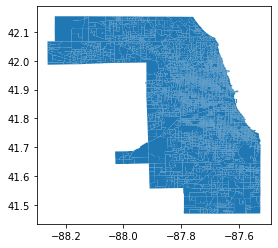

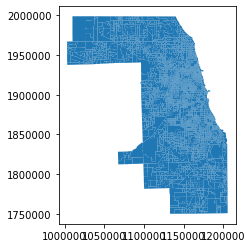

In [32]:
# Let's check the crs attributes of both gdf

print(f'This is the original blk coordinate system: {blk.crs}\n')
print(f'This is the original rdl coordinate system: {rdl.crs}\n')
# Good so both files came with their own crs and it turns out it is the same.
# Let's plot blk to see how it looks like
blk.plot()
# It is still not the crs we want.
# We create the Illinois regional crs by mean of the PROJ string I found.
# Honest confession: I don't know how to read a PROJ string, but it works.
# Pyproj and Geopandas will know what to do with it.
il_proj = "+proj=tmerc +lat_0=36.66666666666666 +lon_0=-88.33333333333333 +k=0.9999749999999999 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs "
# This is from pyproj
il_crs = pyproj.CRS(il_proj)
# This will give you the epsg number
epsg_numb = il_crs.to_epsg()
# and this will actually change the crs of the data
blk = blk.to_crs(epsg_numb)
rdl = rdl.to_crs(epsg_numb)
print(f'This is the new crs of blk: {blk.crs}\n')
print(f'This is the new crs of rdl: {rdl.crs}\n')
# We can see the new projection has no name, but it works nonetheless
blk.plot()

Leaving aside the geometry and the crs, a GeoDataFrame is still a DataFrame. So we will use the same method we saw last time to inspect it.

In [17]:
print(f"First five lines of blk:\n{blk.head()}\n\n")
print(f"Info for blk:\n{blk.info()}\n\n")
print(f"First five lines of rdl:\n{rdl.head()}\n\n")
print(f"Info for rdl:\n {rdl.info()}")

First five lines of blk:
  STATE_FIPS CNTY_FIPS STCOFIPS   TRACT BLKGRP          FIPS  POPULATION  \
0         17       031    17031  804507      4  170318045074       693.0   
1         17       031    17031  804507      2  170318045072      3922.0   
2         17       031    17031  804509      4  170318045094      1903.0   
3         17       031    17031  804509      1  170318045091      1267.0   
4         17       031    17031  804505      2  170318045052      1199.0   

   POP_SQMI  POP2010  POP10_SQMI  ...  SQMI  Shape_Leng  Shape_Area  Male  \
0     597.4    739.0       637.1  ...  1.16    0.105978    0.000327   129   
1    2650.0   3831.0      2588.5  ...  1.48    0.129834    0.000416  2148   
2    6138.7   1835.0      5919.4  ...  0.31    0.054435    0.000087  1060   
3    5759.1   1235.0      5613.6  ...  0.22    0.033944    0.000061   797   
4    2997.5   1143.0      2857.5  ...  0.40    0.083217    0.000113   533   

   Female   mn_prop  2010_densi  2017_densi  density_di

From this first exploratory steps, it is immediately clear we need to do some data cleaning. Specifically, the rdl GeoDataFrame contains the enterity of the US. Most of this is not relevant for us. We need to find only those blocks we are interested in -- that is the blocks in Cook County. The easy way is to select all the blocks in IL. Then we need to be sure we get the blocks in Cook County, and only those.

We will use the [.unique( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html?highlight=unique#pandas.Series.unique, ".unique( )") method to get the surveyed cities in Illinois. As the name suggests, .unique( ) will output all the different values in a Series. Reminder: Each column in a (Geo)DataFrame is a Series, so we can use .unique( ) to check the unique values of a column.

In [39]:
# Filter for IL
rdl = rdl.loc[rdl['state'] == 'IL']
print(f"These are the cities in IL: {rdl['city'].unique()}")
# Easy enough: we will just look at the Chicago block
rdl = rdl.loc[rdl['city'] == 'Chicago']

These are the cities in IL: ['Aurora' 'Chicago' 'Decatur' 'East St. Louis' 'Joliet' 'Rockford'
 'Springfield']


#### Creating Maps with GeoPandas

The columns "WHITE" and "BLACK" from the blockgroups map are what we will be using in our analysis. A first step will be to map the two populations their distribution in Chicago and then compare it to the map of HOLC blocks. Here we will look at the [.plot( )](https://geopandas.readthedocs.io/en/latest/mapping.html#mapping, "User Guide to mapping") method of the GeoDataFrame in more details. 

<div class="alert alert-block alert-success">
<b>cmap:</b> A color map (cmap) is a function mapping number to colors. Beware that the cmap of a plot may change the readers' interpretation of the plot, all else being equal. GeoPandas is based on matplotlib and supports all pre-defined cmaps already present in matplotlib. You can also create your own cmap and pass it to the GeoPandas plotter, as shown in the code. For more information about cmap and a list of existing cmaps:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
</div>

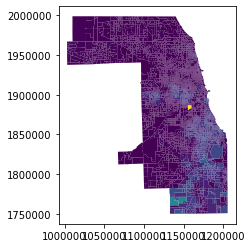

In [42]:
# To plot a Cloropleth map, we can pass the column keyword. For example
blk.plot(column = 'BLACK')

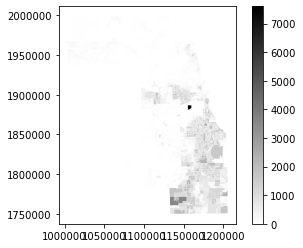

In [43]:
# We can change the colorscheme using the cmap keyword. 
# We will also add a legend using the legend keyword.
blk.plot(column = 'BLACK', legend = True, cmap = 'gist_gray_r')

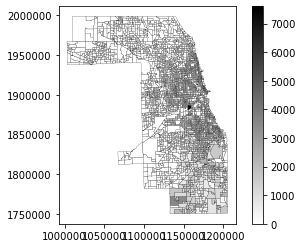

In [46]:
# Almost there. We need to make sure the dividing lines of the blocks are shown
# Otherwise we will not be able to see the plot at all (since the background is white)
blk.plot(column = 'BLACK', legend = True, cmap = 'gist_gray_r', linewidth=0.2, edgecolor='black')

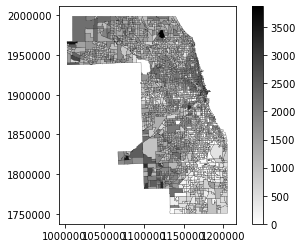

In [45]:
# Good, now the WHITE column. Same exact arguments
blk.plot(column = 'WHITE', legend = True, cmap = 'gist_gray_r', linewidth=0.2, edgecolor='black')

You may notice that the maps are not properly comparable because the scale of the columns is widely different -- the BLACK picks over 7,000 while the WHITE column picks at roughly 3,700. We tackle this issue in the Extra session below. Now we proceed with plotting of the redlining map _over_ the map of the black population.

We need a little preparation to create the plot we want!

In [52]:
# We need a slight bit of matplotlib to do map overlay.
from matplotlib.colors import ListedColormap 

# We start by mapping the rdl holc_grade column to numbers.
# Ultimately, we always want to input numbers in matplotlib
grade_dic = {"A": 0, "B": 1, "C": 2, "D": 3}
# We create a specific cmap for this plot. 
# We use one of matplotlib's special function for this
# The newly created map will map 0 to green, 1 to blue, etc.
cmap_rdl = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_cmap')
# Now we substitue the original data in the holc_grade column with its mapped numbers
rdl['holc_grade'] = rdl['holc_grade'].apply(lambda x: grade_dic[x])
print(f'The dtype of the holc_grade column now is: {rdl["holc_grade"].dtype}')

The dtype of the holc_grade column now is: int64


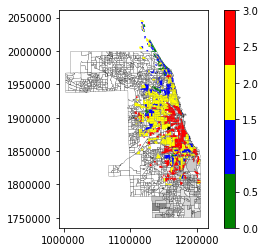

In [57]:
# Now we can start to plot. Again need a little of matplotlib syntax
fig, ax = plt.subplots()
# This is exactly the same plot as before, but notice the argument ax
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax)
# By passing the same value to the ax argument, we can overlay maps
rdl.plot(column = 'holc_grade', legend = True, cmap = cmap_rdl, 
         linewidth=0, ax = ax)

One of the (many) problems of this plot is that the HOLC blocks completely cover what behind them, making the information unreadable. We address this issue below.

However, the other big issue regard the confusing and uninformative legend. Creating a good legend for this plot is well outside the scope of this workshop -- see below for some hint. 

Naturally, another problem regards the dimensions of the plot, but this is a lesser problem. In actual research, we would save the image on our HD with an appropriate size -- in my own research, this map is a png image occupying roughly 6MB.

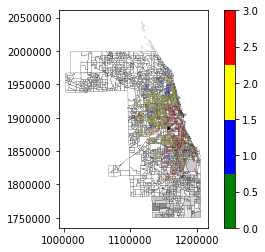

In [59]:
# To make sure that the HOLC information does not
# completely obscure the other information, we need to make it semi-transparent
# We use the argument alpha for this
fig, ax = plt.subplots()
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax)
# Notice alpha
rdl.plot(column = 'holc_grade', legend = True, cmap = cmap_rdl, 
         linewidth=0, ax = ax, alpha = 0.2)

Had the cmap of the BLACK column been actually informative, we would notice that the redlined block still align quite well with the density of the black population. However, plotting may not be enough.

##### Extra Material on Mapping

Let's ameliorate the previous plot by making the scale for the BLACK column more readable. The plot will still not be perfect, but it will definitely be clearer. You may notice that the BLACK and WHITE maps are not properly comparable because the scale of the columns is widely different -- the BLACK picks over 7,000 while the WHITE column picks at roughly 3,700. One may wonder:

1.   What is happening with the BLACK column? What is that enourmous concentration of black people in the middle of Cook County? How comes that the max value of the BLACK column is so much bigger than the max value of the WHITE column while, at the same time, the black population is roughly one third of the white population?
2.   Can we put the two maps on the same scale and, at the same time, make the map of the black population more legible? You may notice that the 7,000 block is actually making the map difficult to read because every other block has much less black population. This entails that the color of all other blocks will be more or less the same and the map will not provide much visual clue about the variation of the BLACK variable beyond its concentration in the 7,000 block. 

###### The 7,000 block

May this be a data issue? Is the Census data wrong? No, unfortunately. The Census data is capturing the reality of mass incarceration in the US. It turns out that the 7,000 block is occupied by the Cook County Jail. Veryfing this in GeoPandas is an interesting exercise. 

We start by Googling the lat-long coordinates of the jail, see the image.

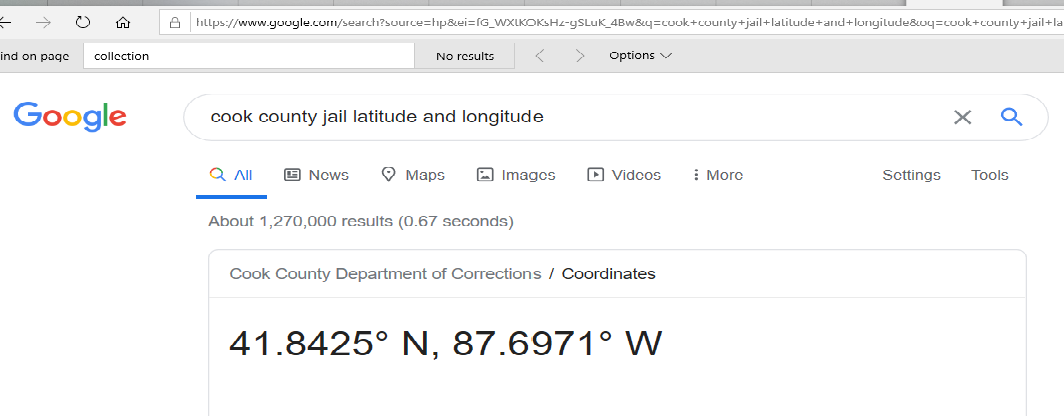

Now we can input these in a GeoSeries, translate the long-lat coordinate in the regional coordinate system we are using,  plot the result onto the BLACK map to see that the posit. Here we use the fact that GeoSeries have a .crs( ) attribute as well and can handle the same kind of crs transformations that a GeoDataFrame handles.

In [63]:
# From Google, these are the long-lat coordinate of Cook County Jail
jail = [-87.6971, 41.8425]
jail = gpd.GeoSeries(shapely.geometry.Point(jail))
# EPSG:4326 is the long-lat crs
# This line is making clear to GeoPandas what it is dealing with
jail.crs = "EPSG:4326"
jail = jail.to_crs(il_proj)
print(jail.crs)

+proj=tmerc +lat_0=36.66666666666666 +lon_0=-88.33333333333333 +k=0.9999749999999999 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs  +type=crs


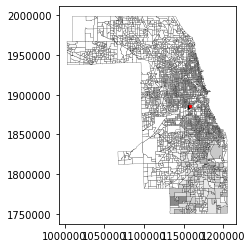

In [68]:
fig, ax = plt.subplots()
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax)
# We overlay the jail as a red point
# Notice the color and markersize arguments
jail.plot(color = 'red', markersize=5, ax = ax)
# We see the red point on top of the block causing issues
# The jail is indeed the problem!

###### Controlling the Scale

As a last effort, we will change the scale of the BLACK plot so that it matches the scale of the WHITE plot. This may not be the right strategy to change the scale. Specifically, using the same scale as the WHITE scale will entail flattening the cmap beyond the max value of the WHITE variable. That is, any block with a BLACK variable bigger than the max value of the WHITE variable  will have the same, solid-black color. This way, we may be losing information. So, let's check what we are losing.

In [73]:
print(blk.loc[blk['BLACK']>blk['WHITE'].max(), 'BLACK'])

2240    7603.0
Name: BLACK, dtype: float64


Once we are clear about the fact that the Cook County Jail datapoint is skewing all the data and therefore will be substantially ignored, our map will not conceal any information about any other block. This way, we achieve a much greater clarity in the map and a direct comparability of the WHITE and BLACK variable distributions.

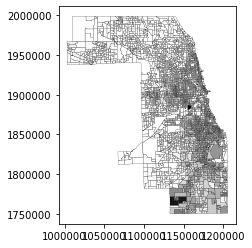

In [86]:
# To control the scale of the variable, 
# we will indicate the relevant interval to the .plot( ) method
# using the vmin and vmax arguments.
# vmin is 0 since this is the natural lower bound for this variable
# vmax is capped at the max for the WHITE variable
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black',
        vmin = 0, vmax = blk['WHITE'].max())

To see the difference between the distribution of the black and white population we can plot the BLACK and WHITE maps alongside each others. 

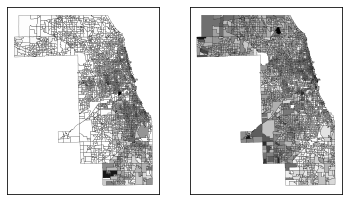

In [83]:
# We use matplotlib subplots function to get the maps side by side
fig, ax = plt.subplots(1,2)
# notice the ax parameter in both calls to plot()
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax[0],
        vmin = 0, vmax = blk['WHITE'].max())
blk.plot(column = 'WHITE', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax[1], cax = cax)
# These lines take out the useless ticks from the x and y axes
ax[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

Finally, we remake the plot showing the HOLC block colors over the BLACK distribution. Even if the plot is far from perfect, you would see in a bigger figure that the map is now much clearer.

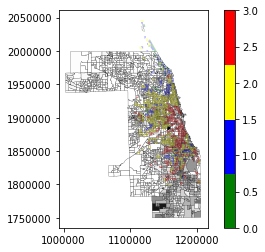

In [85]:
# overlay the HOLC map with the BLACK distribution.
fig, ax = plt.subplots()
blk.plot(column = 'BLACK', cmap = 'gist_gray_r', 
         linewidth=0.2, edgecolor='black', ax = ax,
        vmin = 0, vmax = blk['WHITE'].max())
rdl.plot(column = 'holc_grade', legend = True, cmap = cmap_rdl, 
         linewidth=0, ax = ax, alpha = 0.3)

#### Your turn!

In the blk data you can see there is a "FEMALES" and a "MALES" column showing how many women and men live in a block. Construct a new column named "m_prop" containing the proportion of men over the total population (that is, the sum of women and men). Map it using a different cmap. You can find a list of available cmaps [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#, "Cmaps List"). Is the distribution of women and men the same? As an additional exercise, try to plot the two maps one along the other, as shown above.

In [99]:
# Construct the new column
#blk['m_prop'] = ...
# plot it
#blk.plot(...)
# Plot the two maps alongside each other

### Geometrical Manipulation

GeoPandas truly shines because of its built-in integration with Shapely. Shapely lets you do very powerful manipulation of your current geometry with an easy (in my opinion) syntax. Here, I showcase a little of this power. We will continue exploring the relationship between residential segregation and redlining by constructing a tabulation of where the white and black population lives. Specifically, we will be looking at the HOLC grade assigned to the block where black and white individuals live and then construct a table of race by holc grade. 

The difficulty of this analysis is that HOLC blocks do not correspond to current Census blocks. In a database terminology we would say there is a many to many relationship. For didactical purposes, we will be using a simple approach to this issue. We will condense each block into one point (its centroid) and then check in which kind of HOLC block the centroid falls. This will be done with the [.contains( )](https://shapely.readthedocs.io/en/latest/manual.html#object.contains, ".contains( ) Documentation") method of Shapely objects. As the name suggests, .contains( ) checks if a shape (a point in this case) is contained within another shape (a polygon). We will also create a special class of blocks that are not in any HOLC block. Finally, we will use the [.groupby( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby, ".groupby( ) Documentation") method of the DataFrame object to see how many black and white individuals live in the different kinds of HOLC blocks.

<div class="alert alert-block alert-success">
<b>Rtree:</b> In the next block we are going to check if a point (representing an entire block) is contained in any HOLC block. There are 3992 points and 580 HOLC blocks. Therefore, we are going to perform 3992 * 580 = 2,315,360 checks. As you will see, the code turns out to be surprisingly quick, but this kind of checks are in general a bottleneck in the code. In cases where the code is slower, you should implement a spatial index. This is native feature of GeoPandas that makes geometrical checks like these much quicker. A spatial index use the concept of rectangular trees, from here the name of rtree. See this post for an introduction: https://geoffboeing.com/2016/10/r-tree-spatial-index-python/</div>



In [116]:
# To create the centroid, we can use the centroid method from GeoPandas!
blk['centroid'] = blk.centroid
# Now, we map each block to a HOLC grade.
# We also need to consider those Census blocks that are not within any HOLC blocks
holc_grades = []
for id_, p in blk['centroid'].iteritems():
    print(id_)
    # Create a boolean series checking if the point is within a HOLC block
    bool_ser = rdl['geometry'].apply(lambda x: x.contains(p))
    # We are interested only those values that are True from the series
    # reminder: False = 0 and True = 1 when added together. 
    # s will contain the total number of True in the bool_ser variable
    s = bool_ser.sum()
    if s == 0:
        # We put -1 to signal that no HOLC grade was ever given to a block
        holc_grades.append(-1)
    else:
        # There will always be at most one HOLC block for any Census block
        # Thus this selection will output one and only one element
        holc_grades.append(rdl.loc[bool_ser, 'holc_grade'].values[0])
blk['holc_grades_cent'] = holc_grades
# Create the table using the .groupby() method of DataFrames
table = blk.loc[:,['holc_grades_cent', 'BLACK', 'WHITE']].groupby(
    'holc_grades_cent').sum()
print(f'Distribution of the black and white population in different kinds of HOLC blocks in Cook County:\n{table}')

(3992, 64)
(580, 7)
